In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.sans-serif']=['simhei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv('../data/xigua3.0.csv')
data

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,否


In [3]:
data = data[['密度','含糖率','好瓜']]
data['好瓜'] = data['好瓜'].replace({"是":1, "否":0})
data

C:\Users\wangy\AppData\Local\Temp\ipykernel_10412\2683831932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['好瓜'] = data['好瓜'].replace({"是":1, "否":0})


,密度,含糖率,好瓜
0,0.697,0.460,1
1,0.774,0.376,1
2,0.634,0.264,1
3,0.608,0.318,1
4,0.556,0.215,1
5,0.403,0.237,1
6,0.481,0.149,1
7,0.437,0.211,1
8,0.666,0.091,0
9,0.243,0.267,0


In [5]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=1000000000)
model.fit(data[['密度','含糖率']], data['好瓜'])
model.score(data[['密度','含糖率']], data['好瓜'])

1.0

In [6]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)
x, y = np.meshgrid(x,y)
disp_input = np.vstack((x.flatten(), y.flatten())).T
disp_predict = model.predict(disp_input)
disp_predict

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

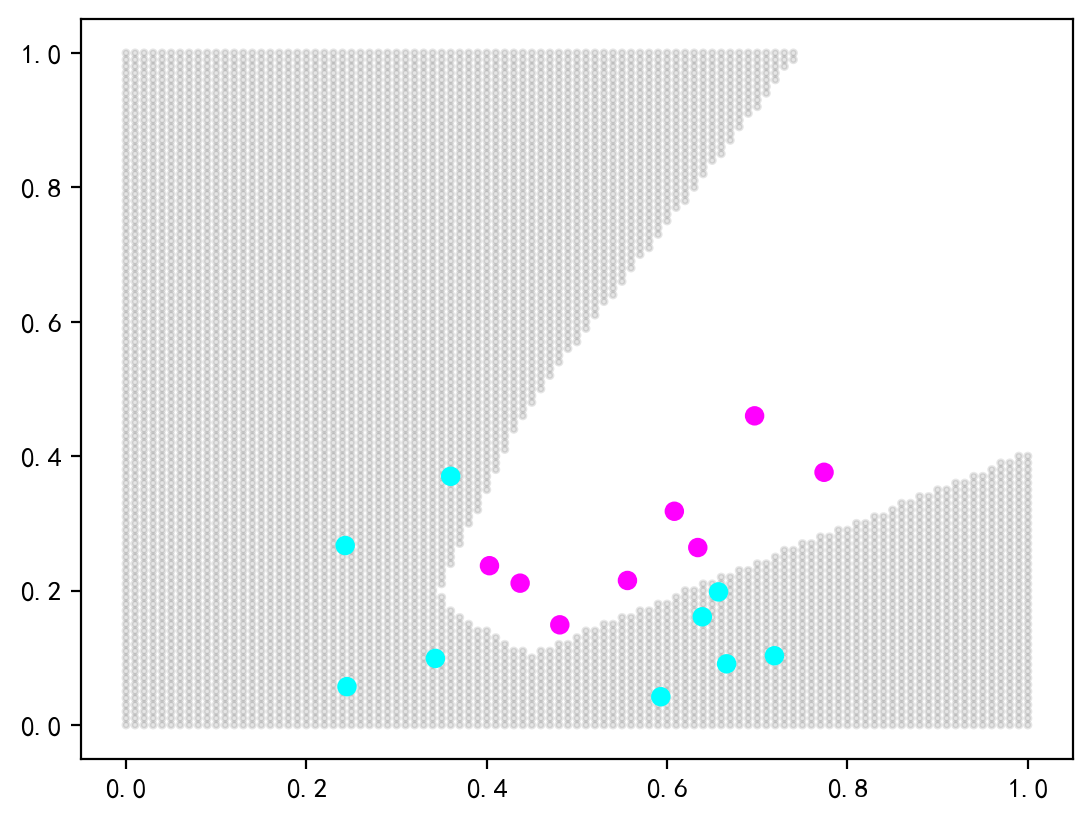

In [7]:
plt.figure(dpi=200)
plt.scatter(disp_input[:,0], disp_input[:,1], c=disp_predict, cmap='gray', alpha=0.1, s=5)
plt.scatter(data['密度'],data['含糖率'], c=data['好瓜'], cmap='cool')
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


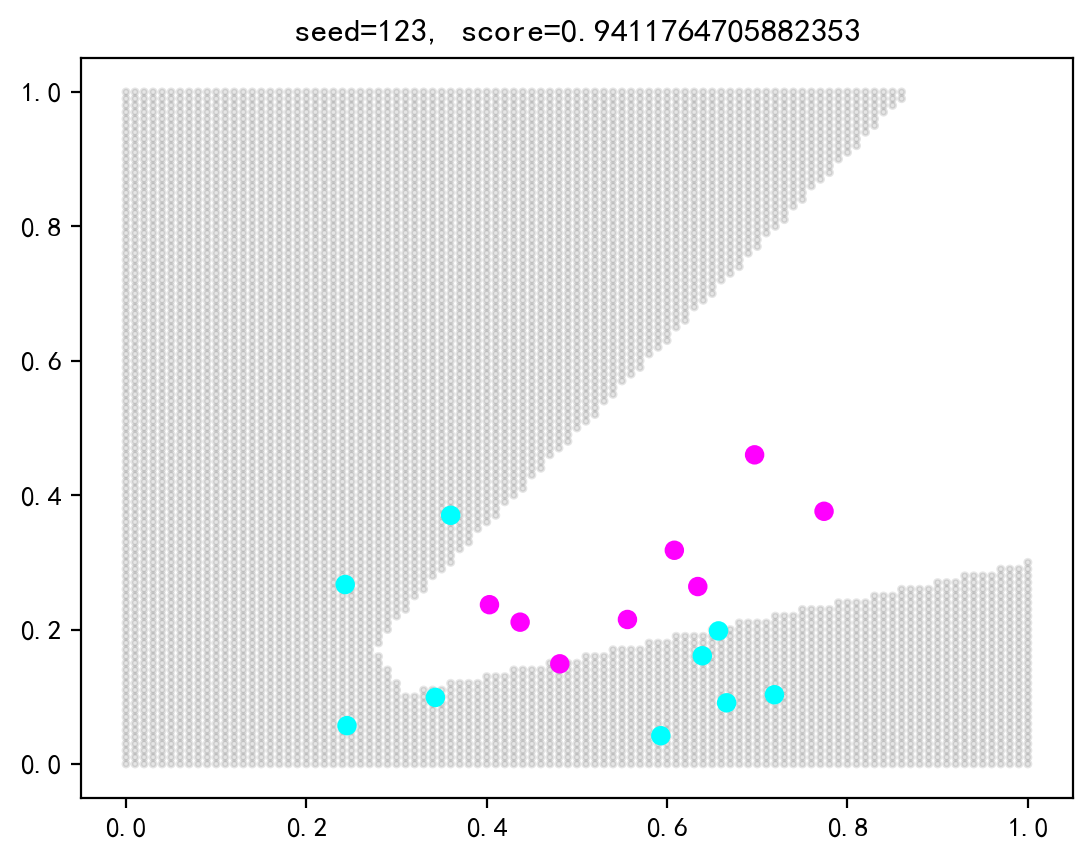

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


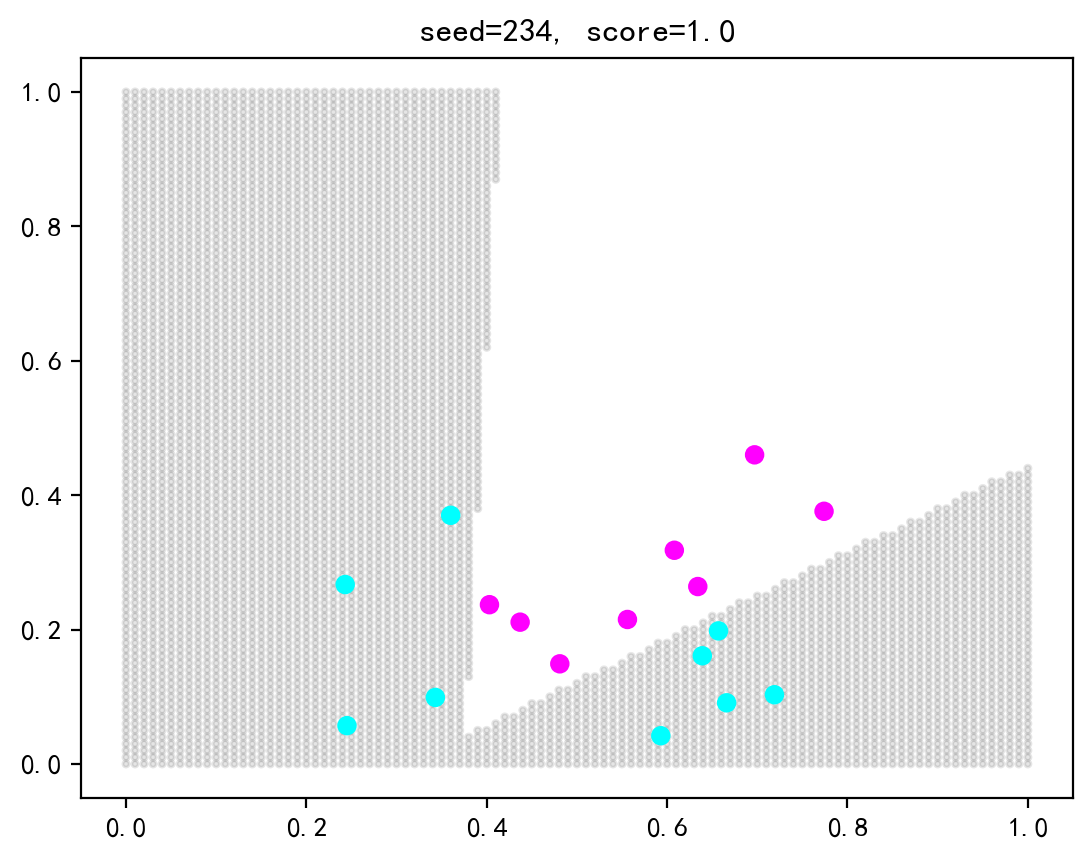

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


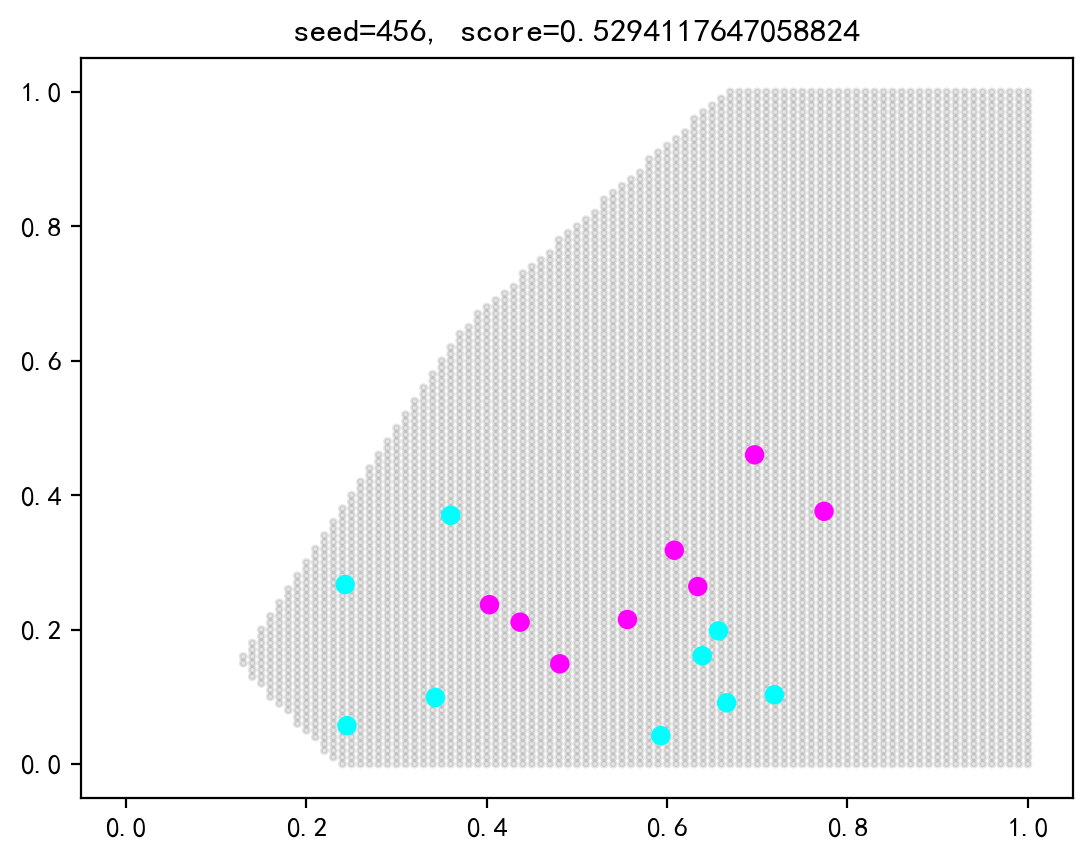

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


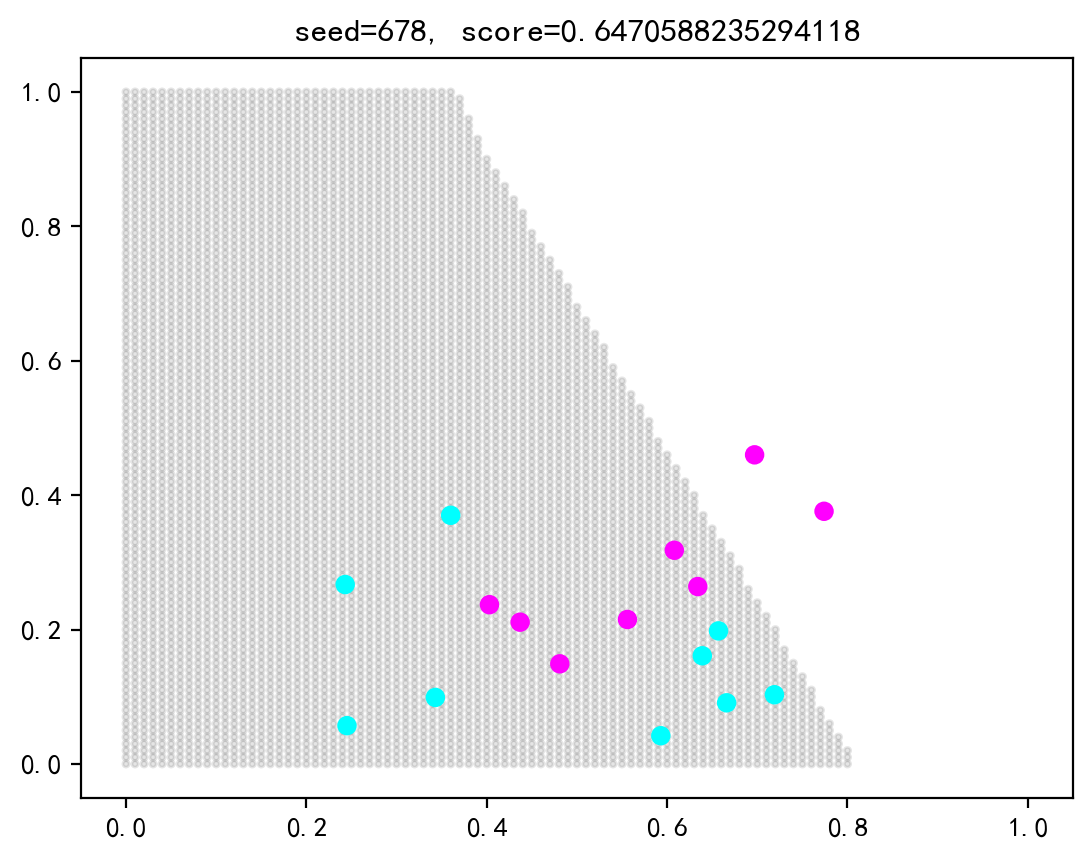

In [32]:
from sklearn.neural_network import MLPClassifier
import sklearn

for seed in [123,234,456,678]:
    model = MLPClassifier(max_iter=10000000,
                          hidden_layer_sizes=(8,4),
                          random_state=seed)
    model.fit(data[['密度','含糖率']], data['好瓜'])
    # print(model.score(data[['密度','含糖率']], data['好瓜']))
    disp_predict = model.predict(disp_input)
    plt.figure(dpi=200)
    plt.scatter(disp_input[:,0], disp_input[:,1], c=disp_predict, cmap='gray', alpha=0.1, s=5)
    plt.scatter(data['密度'],data['含糖率'], c=data['好瓜'], cmap='cool')
    plt.title("seed={}, score={}".format(seed,
                                         model.score(data[['密度','含糖率']], data['好瓜'])))
    plt.show()

In [38]:
# 回归
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model.fit(data[['密度']], data['含糖率'])
print(model.score(data[['密度']], data['含糖率']))

-0.1282064947158832


C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


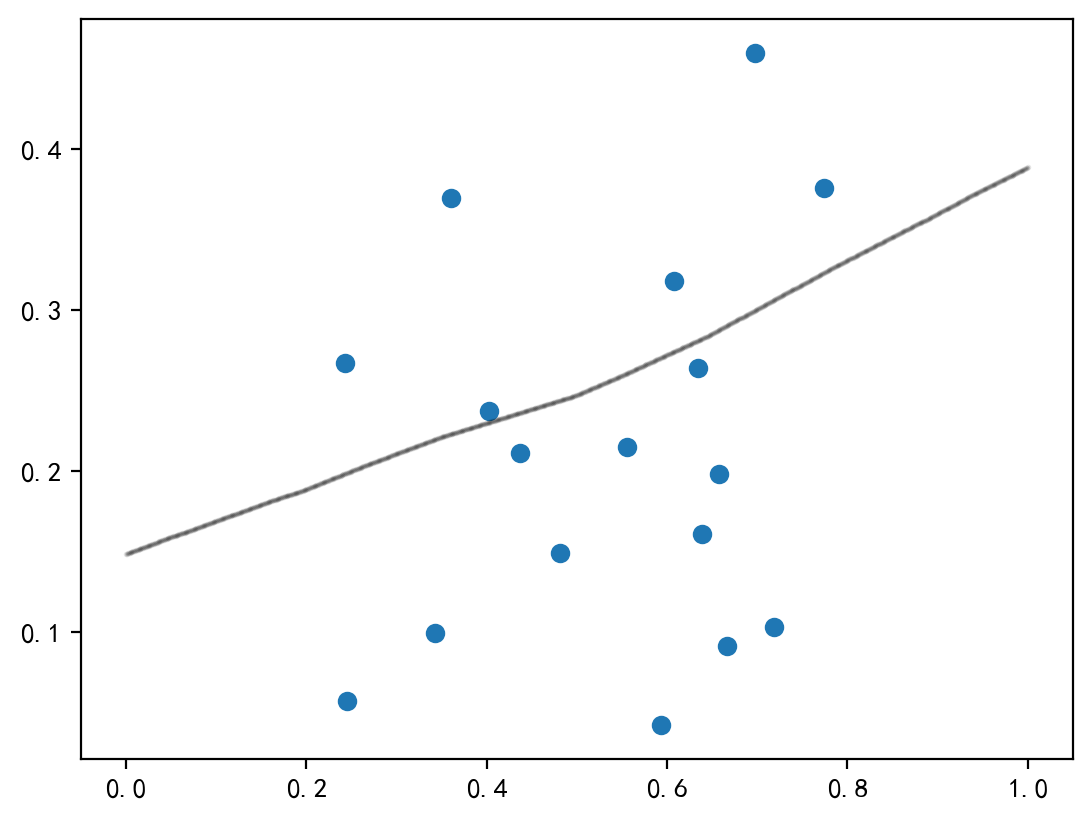

In [40]:
x_line = np.linspace(0, 1.0, 1001).reshape((1001,1))
y_line = model.predict(x_line)
plt.figure(dpi=200)
plt.scatter(data['密度'],data['含糖率'])
plt.scatter(x_line, y_line, c='black', alpha=0.1, s=1)
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


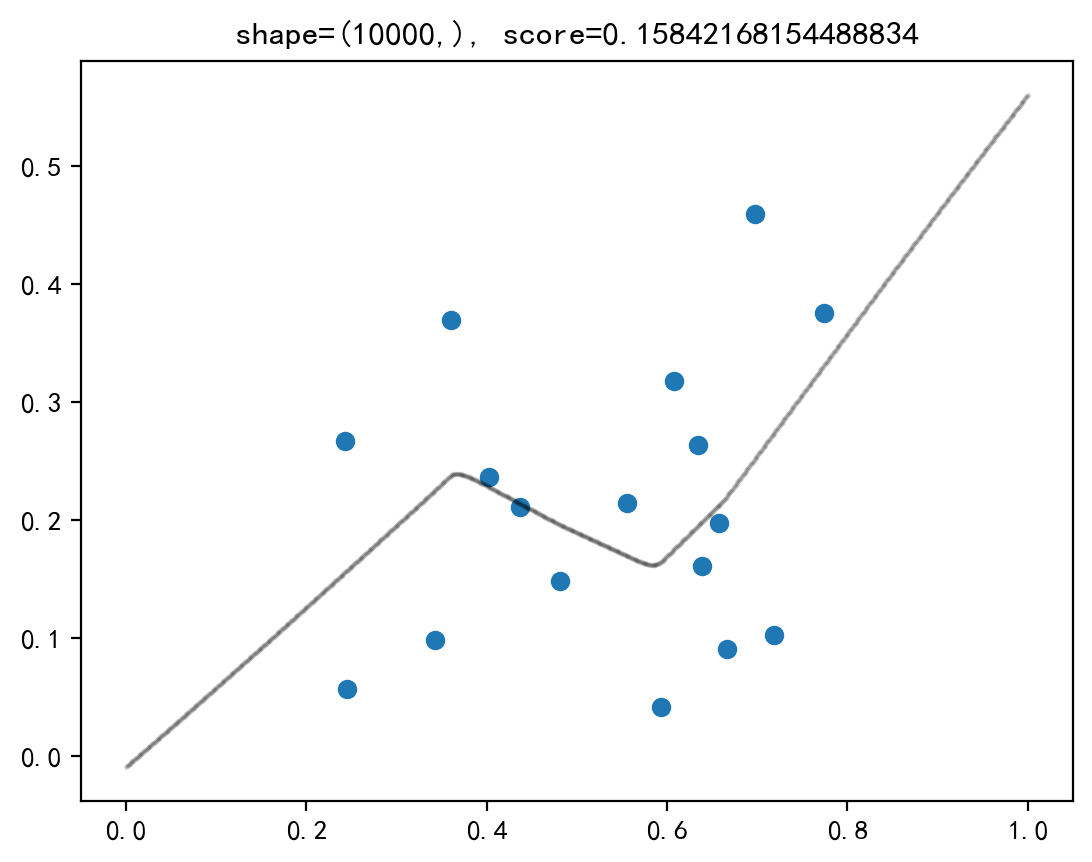

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


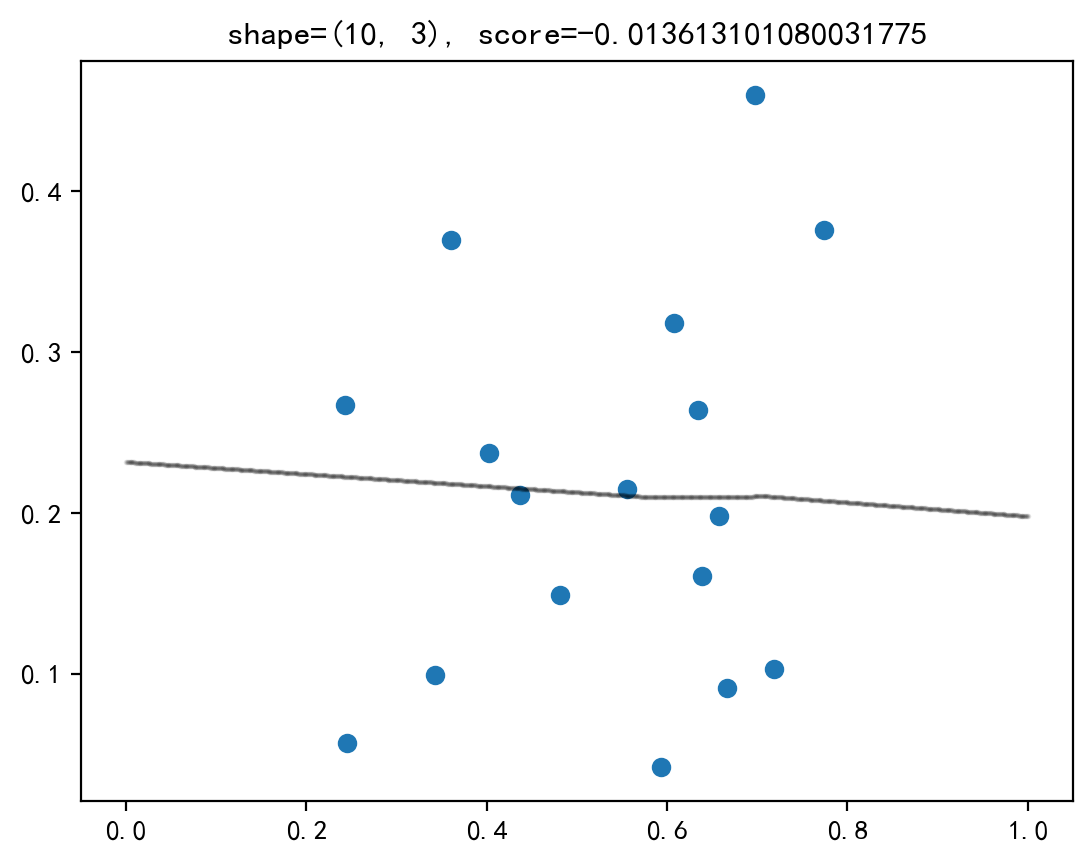

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


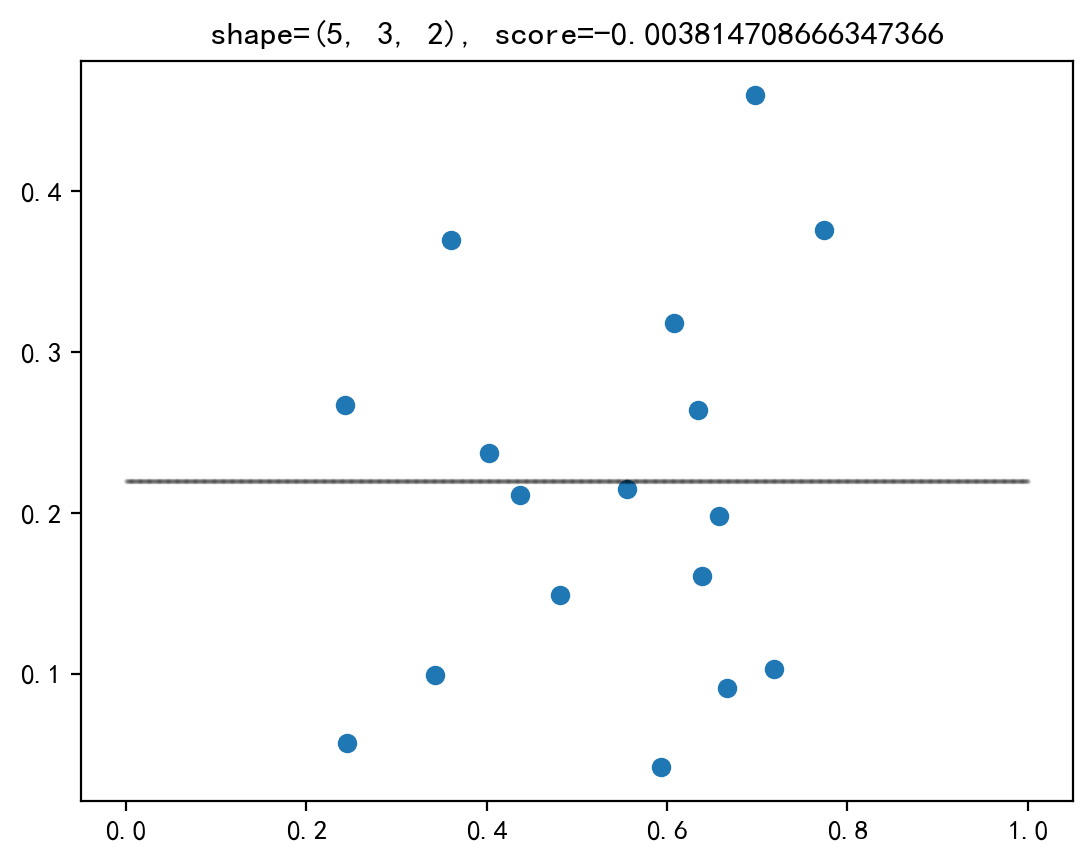

In [41]:
for model_shape in [(10000,), (10,3), (5,3,2)]:
    model = MLPRegressor(hidden_layer_sizes=model_shape,
                         max_iter=10000000,
                         tol=1e-6)
    model.fit(data[['密度']], data['含糖率'])
    # print(model.score(data[['密度']], data['含糖率']))
    x_line = np.linspace(0, 1.0, 1001).reshape((1001,1))
    y_line = model.predict(x_line)
    plt.figure(dpi=200)
    plt.scatter(data['密度'],data['含糖率'])
    plt.scatter(x_line, y_line, c='black', alpha=0.1, s=1)
    plt.title("shape={}, score={}".format(model_shape,
                                         model.score(data[['密度']], data['含糖率'])))
    plt.show()

In [43]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

C:\conda\venv\torch\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [44]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [45]:
boston_pd = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [46]:
boston_2_data = boston_pd[['LSTAT']].values
boston_2_target = boston.target
print(boston_2_target.shape, boston_2_data.shape)

(506,) (506, 1)


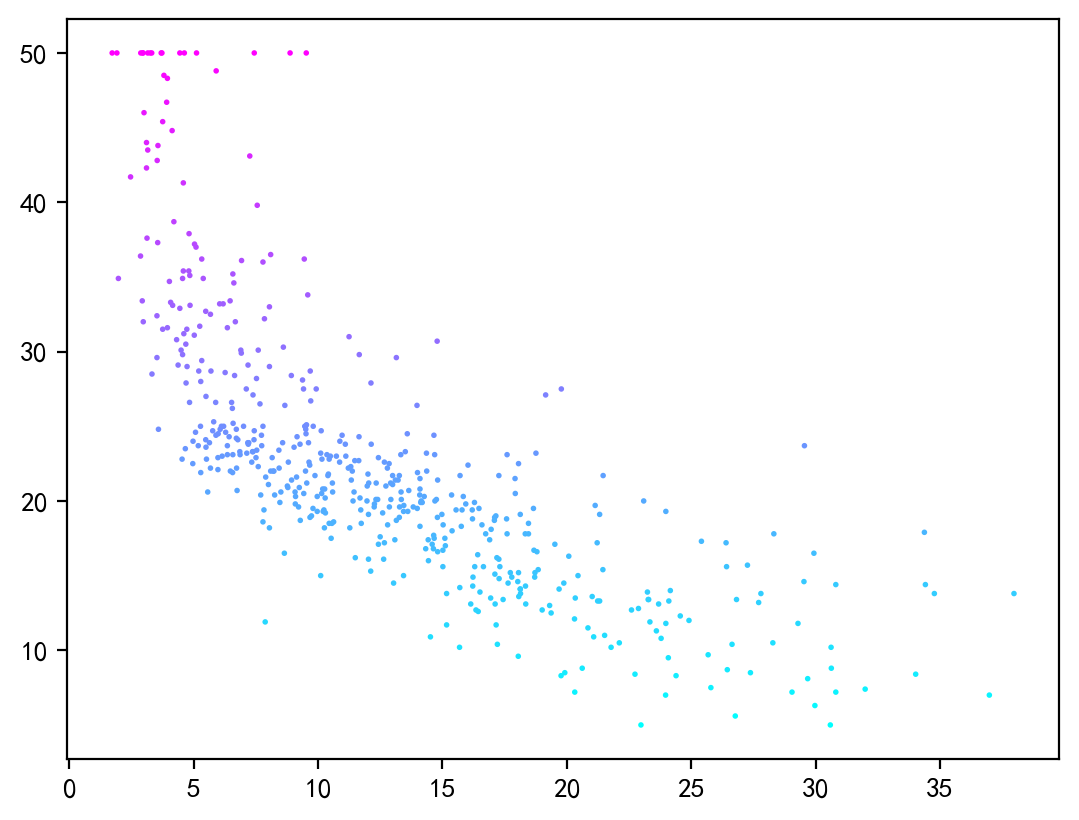

In [48]:
plt.figure(dpi=200)
plt.scatter(boston_2_data, boston_2_target, c=boston_2_target, cmap='cool', s=1)
plt.show()

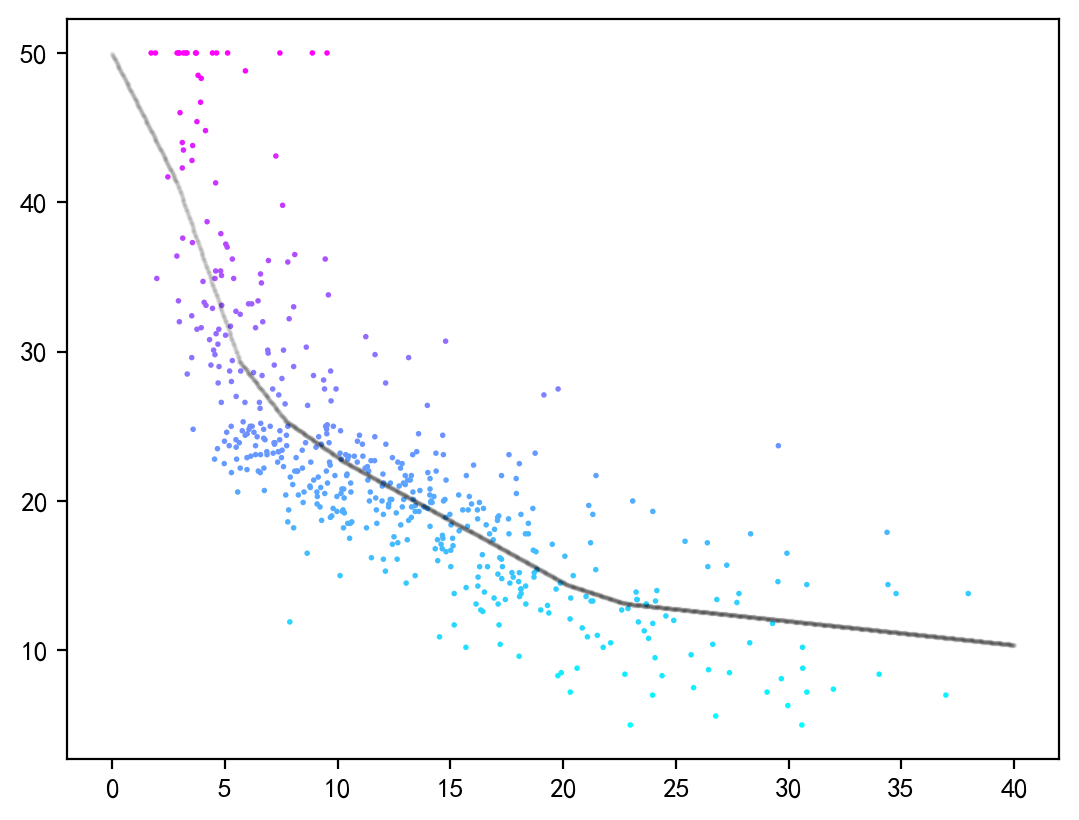

In [53]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(max_iter=100000)
model.fit(boston_2_data, boston_2_target)

x_line = np.linspace(0, 40, 1000)
x_line = x_line.reshape((len(x_line), 1))

y_line = model.predict(x_line)
plt.figure(dpi=200)
plt.scatter(boston_2_data, boston_2_target, c=boston_2_target, cmap='cool', s=1)
plt.scatter(x_line, y_line, c='black', alpha=0.1, s=1)
plt.show()

In [54]:
model.score(boston_2_data, boston_2_target)

0.6847255871266869

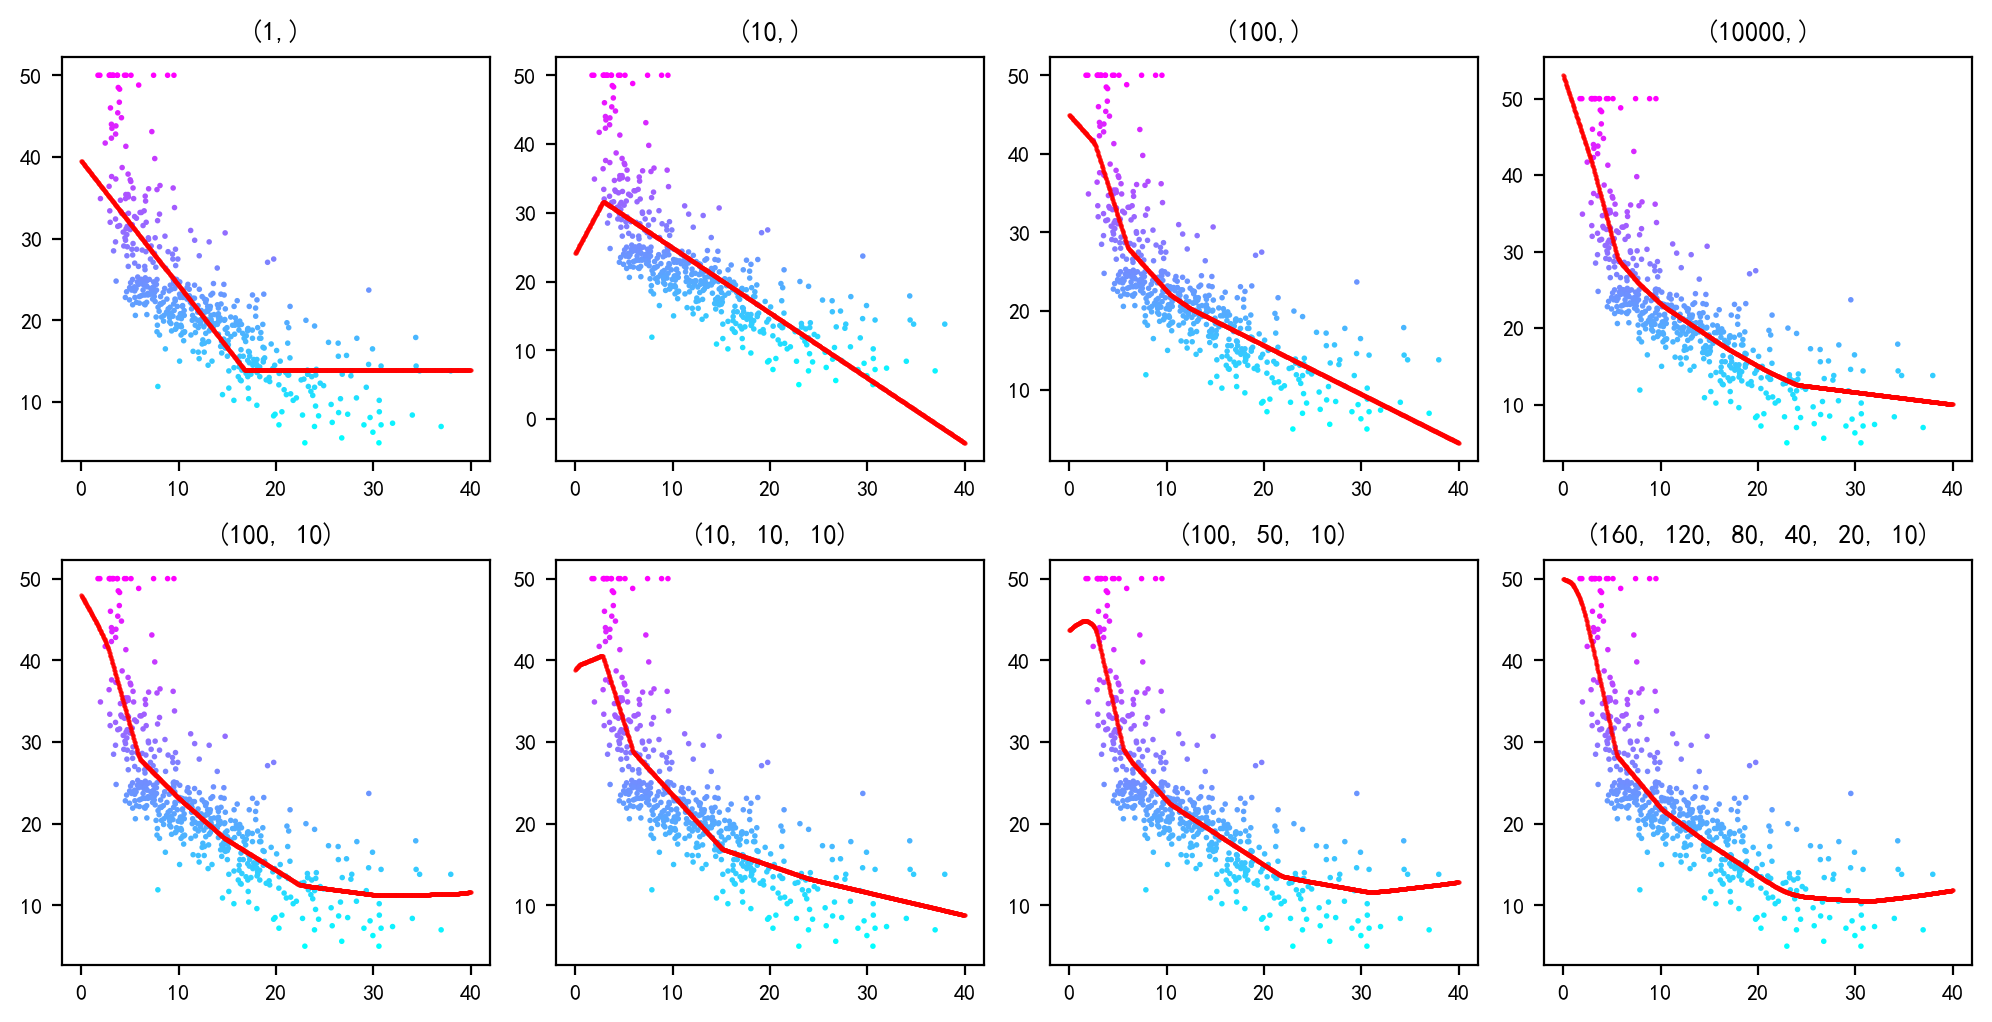

In [55]:
from sklearn.neural_network import MLPRegressor
plt.rcParams['font.size'] = 8
plt.figure(figsize=[10, 10], dpi=200)
for depth_i, i in zip([(1,),
                       (10,),
                       (100,),
                       (10000,),
                       (100,10),
                       (10,10,10),
                       (100,50,10),
                       (160,120,80,40,20,10)], range(1, 100)):
    model = MLPRegressor(hidden_layer_sizes=depth_i, max_iter=10000)
    model.fit(boston_2_data, boston_2_target)
    y_line = model.predict(x_line)
    title = "max_depth={}".format(depth_i)
    plt.subplot(4, 4, i)
    plt.scatter(boston_2_data, boston_2_target, c=boston_2_target, cmap='cool', s=1)
    plt.scatter(x_line, y_line, c='red', alpha=0.8, s=0.3)
    plt.title(depth_i)
plt.tight_layout()
plt.show()